In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = open('D:\\My_python_Data\\Jupyter\\2016鸟\\白鹡鸰 .csv')
my_raw_data = pd.read_csv(df)
mydata = my_raw_data[['个体数', '低温', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']]
y = mydata.个体数
X = mydata[['低温', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']]

In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#训练所得模型的系数
print (lr.intercept_)  #常数项
print (lr.coef_)

0.4790736885758887
[-0.00646696 -0.00318608 -0.00290919 -0.00019508 -0.00254305 -0.00034986
 -0.00076866  0.0029903   0.0007175  -0.00277513]


In [23]:
y_pred = lr.predict(X_test)

In [25]:
from sklearn import metrics  
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))

# 用scikit-learn计算RMSE  均方根差(Root Mean Squared Error, RMSE)
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。

MSE: 0.16848358516582876
RMSE: 0.41046752023251337


In [28]:
#我们可以通过交叉验证来持续优化模型，代码如下，我们采用10折交叉验证，即cross_val_predict中的cv参数为10：
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(lr, X, y, cv=10)

In [32]:
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 0.21195713652812279
RMSE: 0.46038802821980807


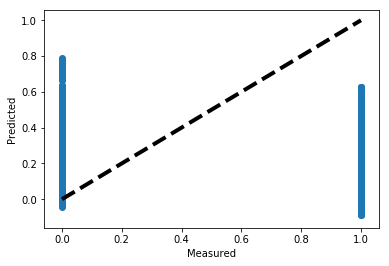

In [33]:
#这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低。代码如下：
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [8]:
#可以自动标准化l
lr2 = LinearRegression(normalize=True)
lr2.fit(X, Y)
predictions2 = lr2.predict(X)
#Y - predictions2

In [9]:
np.mean(Y - predictions)

-5.763548202555024e-16

In [10]:
#定义残差
def MSE(Y, predictions):
    squared_deviation = np.power(Y - predictions, 2)
    return np.mean(squared_deviation)

In [11]:
def MAD(Y, predictions):
    absolute_deviation = np.abs(Y - predictions)
    return np.mean(absolute_deviation)